<a href="https://colab.research.google.com/github/junhyunpark0126/wikipedia-traffic-prediction/blob/main/wikipedia_traffic_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Data

We will be looking at page view data for the Wikipedia article for "Thanksgiving" seen [here](https://en.wikipedia.org/wiki/Thanksgiving).

We will be forecasting the number of page views for the "Thanksgiving" Wikipedia article in November, with the assistance of a time series model called **Prophet**.

### Prepare Data

In [ ]:
# Get the csv file (thanksgiving.csv)
! wget -nc https://storage.googleapis.com/penn-cis5450/thanksgiving.csv

File ‘thanksgiving.csv’ already there; not retrieving.



In [ ]:
# Read in the thanksgiving dataset
# Make sure that the "Date" column is of type date
thanksgiving_df = pd.read_csv('thanksgiving.csv')
thanksgiving_df['Date'] = pd.to_datetime(thanksgiving_df['Date'])

In [ ]:
# Rename the "Date" column "ds" and the "Views" column "y"
# This is crucial for running the Prophet model
thanksgiving_df = thanksgiving_df.rename(columns={'Date': 'ds', 'Views': 'y'})

In [ ]:
# Create thanksgiving_train and thanksgiving_test as defined above
thanksgiving_train = thanksgiving_df[thanksgiving_df['ds'] < pd.Timestamp('2022-11-01')].reset_index(drop=True)
thanksgiving_test =thanksgiving_df[thanksgiving_df['ds'] >= pd.Timestamp('2022-11-01')].reset_index(drop=True)

### Prophet Model

Prophet is a model developed by Facebook that is used for forecasting time series data, similar to ARIMA.

In this section we'll be exploring the Prophet model and comparing **two types of models**; one where you do not account for holidays (Thanksgiving is a U.S. holiday), and one where you do account for holidays.

#### Prophet Model (Base)

In [ ]:
# Create and fit a Prophet model on your training data.
m = Prophet().fit(thanksgiving_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmvphofhk/ggbie2we.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmvphofhk/2cbhkfsm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42849', 'data', 'file=/tmp/tmpmvphofhk/ggbie2we.json', 'init=/tmp/tmpmvphofhk/2cbhkfsm.json', 'output', 'file=/tmp/tmpmvphofhk/prophet_model6ejie87m/prophet_model-20231130065531.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:55:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:55:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# forecast the daily page view numbers for November 2022,
# save them to a dataframe called future_df
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
future_df = forecast[['ds', 'yhat']]
future_df = future_df[future_df['ds'] >= pd.Timestamp('2022-11-01')].reset_index(drop=True)

Create a line plot that has both the **predicted (Prophet forecasting)** and **actual page views (from thanksgiving_test)** for November 2022.

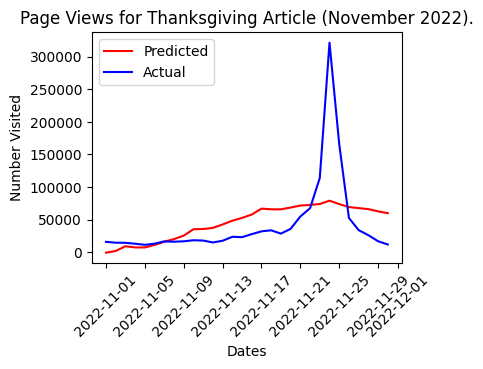

In [ ]:
# Make a lineplot comparing the predicted page view numbers with the actual page view numbers
plt.figure(figsize=(4,3))
plt.plot(future_df['ds'], future_df['yhat'], label='Predicted', color='red')
plt.plot(thanksgiving_test['ds'], thanksgiving_test['y'], label='Actual', color='blue')

plt.title('Page Views for Thanksgiving Article (November 2022).')
plt.xticks(rotation=45)
plt.xlabel('Dates')
plt.ylabel('Number Visited')
plt.legend()

plt.show()

#### Prophet Model (Holiday)

As we saw in the previous section, the base model does a decent job at anticipating an increase in views as we get closer to Thanksgiving Day, but does a poor job of predicting a massive spike on the day itself. Let's see what happens when we rerun the Prophet model but allow the model to incorporate US holidays into its prediction.

In [ ]:
# Create and fit a Prophet model on your training data.
m = Prophet().add_country_holidays(country_name='US').fit(thanksgiving_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmvphofhk/0g35agbt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmvphofhk/c5fnr0ve.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24194', 'data', 'file=/tmp/tmpmvphofhk/0g35agbt.json', 'init=/tmp/tmpmvphofhk/c5fnr0ve.json', 'output', 'file=/tmp/tmpmvphofhk/prophet_model93xqm73x/prophet_model-20231130065533.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:55:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:55:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future_holiday = m.make_future_dataframe(periods=30)
forecast_holiday = m.predict(future_holiday)
future_holiday_df = forecast_holiday[['ds', 'yhat']]
future_holiday_df = future_holiday_df[future_holiday_df['ds'] >= pd.Timestamp('2022-11-01')].reset_index(drop=True)

Again, we create a line plot in matplotlib that has both the **predicted (Prophet forecasting)** and **actual page views (from thanksgiving_test)** for November 2022.

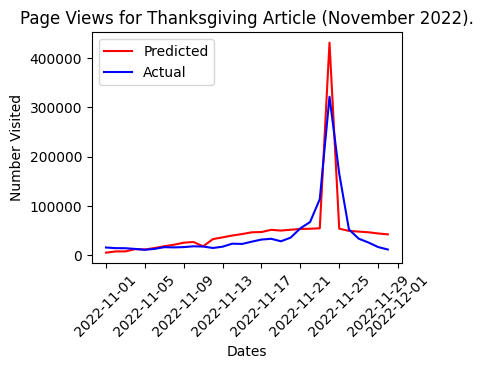

In [ ]:
plt.figure(figsize=(4,3))
plt.plot(future_holiday_df['ds'], future_holiday_df['yhat'], label='Predicted', color='red')
plt.plot(thanksgiving_test['ds'], thanksgiving_test['y'], label='Actual', color='blue')

plt.title('Page Views for Thanksgiving Article (November 2022).')
plt.xticks(rotation=45)
plt.xlabel('Dates')
plt.ylabel('Number Visited')
plt.legend()

plt.show()

**Much better!**